In [210]:
import matplotlib.pyplot as plt
import numpy as np
import MIME_correction

In [211]:
def get_pool_data(first_round_targets : str, second_round_targets : str):
    path = "/datadisk/MIME/deterministic_L_5_q_4_gaussiansample/"
    ground_truth = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/ground_truth.csv", delimiter=",")
    round_1 = np.log(np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/effects.csv", delimiter=","))
    round_2 = np.log(np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/effects.csv", delimiter=","))

    path_unbound_pairwise_counts_r1 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/non_selected/pairwise_count.csv"
    path_unbound_pairwise_counts_r2 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/non_selected/pairwise_count.csv"
    path_bound_pairwise_counts_r1 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/selected/pairwise_count.csv"
    path_bound_pairwise_counts_r2 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/selected/pairwise_count.csv"

    frequency_matrix_r1 = MIME_correction.construct_frequency_matrix(path_unbound_pairwise_counts_r1, path_bound_pairwise_counts_r1, count_minimum=0)
    frequency_matrix_r2 = MIME_correction.construct_frequency_matrix(path_unbound_pairwise_counts_r2, path_bound_pairwise_counts_r2, count_minimum=0)

    corrected_round_1 = np.linalg.solve(frequency_matrix_r1, round_1)
    corrected_round_2 = np.linalg.solve(frequency_matrix_r2, round_2)

    return ground_truth, np.exp(round_1), np.exp(round_2), np.exp(corrected_round_1), np.exp(corrected_round_2)

In [212]:
ground_truths = []
round_1s = []
round_2s = []
corrected_round_1s = []
corrected_round_2s = []

for first_round_targets in ["0.1", "1", "10"]:
    for second_round_targets in ["0.1", "1", "10"]:
        ground_truth, round_1, round_2, corrected_round_1, corrected_round_2 = get_pool_data(first_round_targets, second_round_targets)
        ground_truths.append(ground_truth)
        round_1s.append(round_1)
        round_2s.append(round_2)
        corrected_round_1s.append(corrected_round_1)
        corrected_round_2s.append(corrected_round_2)
        
        

frequency matrix
(15, 15)
matrix is full rank
condition number of matrix:  1.620265944398911
[[1.   0.   0.   0.07 0.02 0.02 0.04 0.03 0.03]
 [0.   1.   0.   0.03 0.02 0.07 0.03 0.04 0.04]
 [0.   0.   1.   0.03 0.03 0.01 0.03 0.03 0.02]
 [0.06 0.02 0.01 1.   0.   0.   0.05 0.02 0.03]
 [0.03 0.03 0.03 0.   1.   0.   0.04 0.02 0.03]
 [0.03 0.06 0.01 0.   0.   1.   0.02 0.03 0.02]
 [0.05 0.03 0.02 0.07 0.03 0.02 1.   0.   0.  ]
 [0.05 0.04 0.02 0.03 0.02 0.04 0.   1.   0.  ]
 [0.04 0.05 0.02 0.05 0.03 0.03 0.   0.   1.  ]]
frequency matrix
(15, 15)
matrix is full rank
condition number of matrix:  1.6115526801215876
[[1.   0.   0.   0.07 0.01 0.05 0.05 0.01 0.04]
 [0.   1.   0.   0.04 0.02 0.02 0.05 0.05 0.02]
 [0.   0.   1.   0.04 0.03 0.03 0.04 0.03 0.05]
 [0.07 0.03 0.02 1.   0.   0.   0.03 0.02 0.03]
 [0.02 0.02 0.03 0.   1.   0.   0.03 0.03 0.03]
 [0.05 0.02 0.02 0.   0.   1.   0.05 0.03 0.03]
 [0.06 0.04 0.03 0.04 0.02 0.06 1.   0.   0.  ]
 [0.02 0.05 0.03 0.03 0.03 0.05 0.   1.   0.

squared error for inferred Kds
0.023
0.009
0.092
squared error for corrected Kds
0.037
0.034
0.048
difference between squared error for inferred Kds and corrected Kds
-0.013
-0.025
0.044


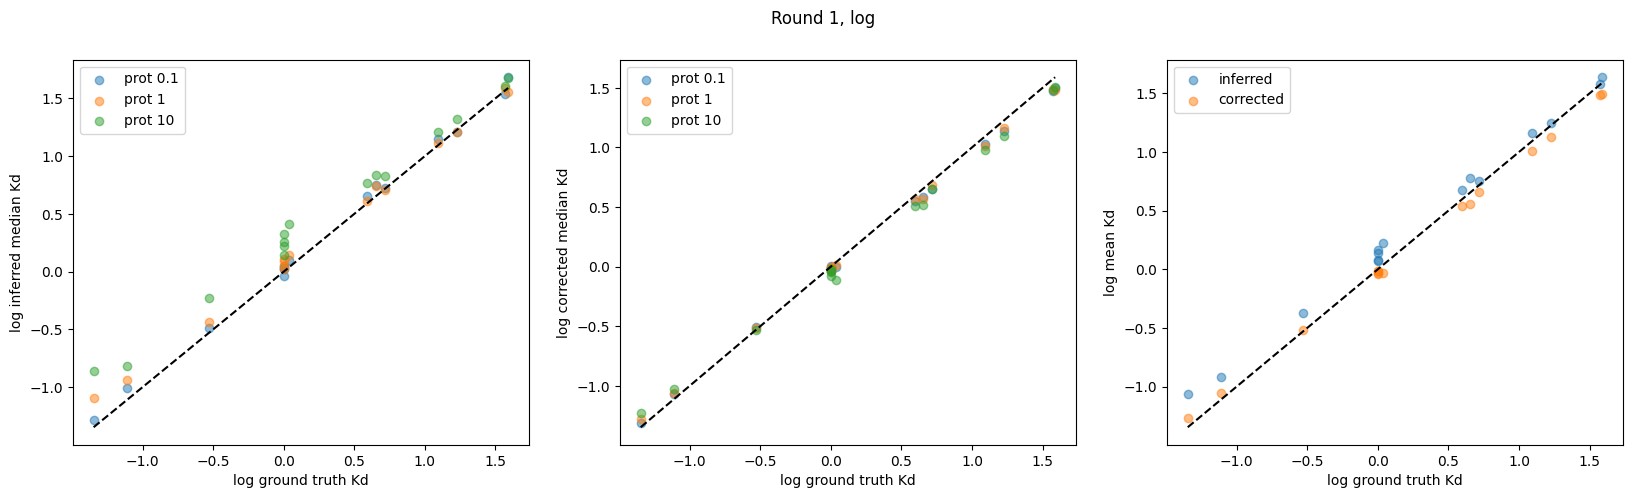

squared error for mean of inferred Kds and corrected Kds
0.022
0.038
difference between squared error for mean of inferred Kds and corrected Kds
-0.016


In [213]:
MIME_correction.comparison_plot(ground_truths[0], round_1s[1], round_1s[4], round_1s[7], corrected_round_1s[1], corrected_round_1s[4], corrected_round_1s[7], "Round 1")

squared error for inferred Kds
0.027
0.011
0.113
squared error for corrected Kds
0.037
0.033
0.056
difference between squared error for inferred Kds and corrected Kds
-0.011
-0.021
0.057


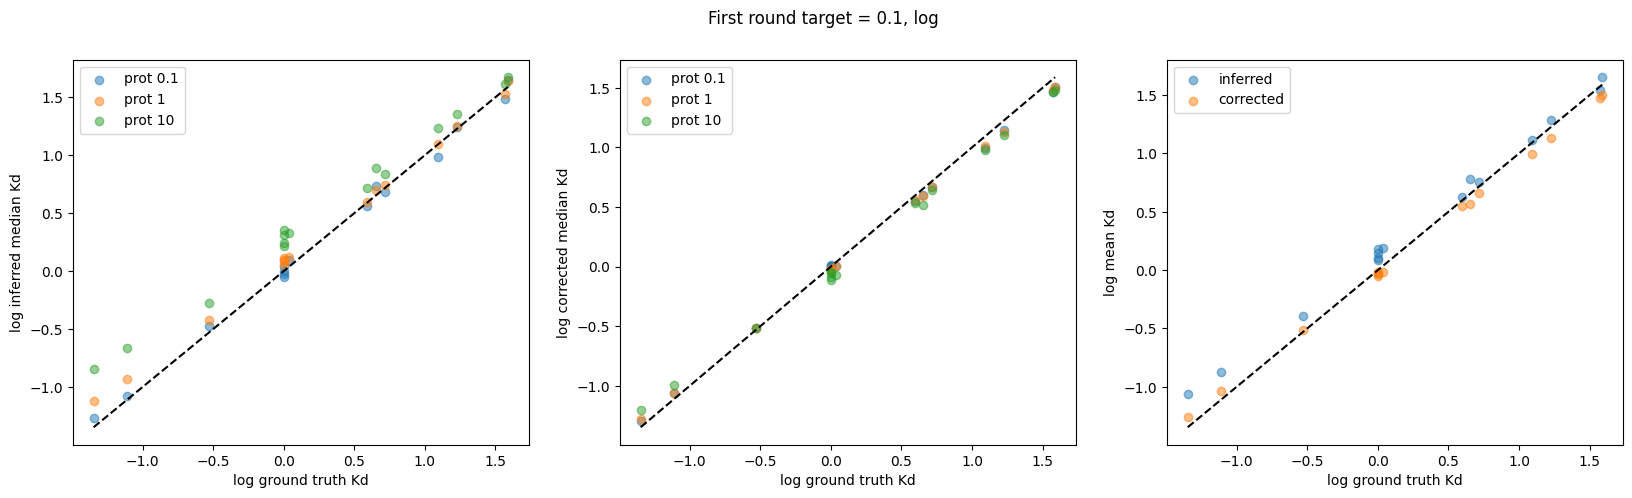

squared error for mean of inferred Kds and corrected Kds
0.025
0.041
difference between squared error for mean of inferred Kds and corrected Kds
-0.016


In [214]:
MIME_correction.comparison_plot(ground_truths[0],round_2s[0],round_2s[1],round_2s[2],corrected_round_2s[0],corrected_round_2s[1],corrected_round_2s[2], "First round target = 0.1")

squared error for inferred Kds
0.011
0.02
0.15
squared error for corrected Kds
0.034
0.023
0.085
difference between squared error for inferred Kds and corrected Kds
-0.023
-0.003
0.065


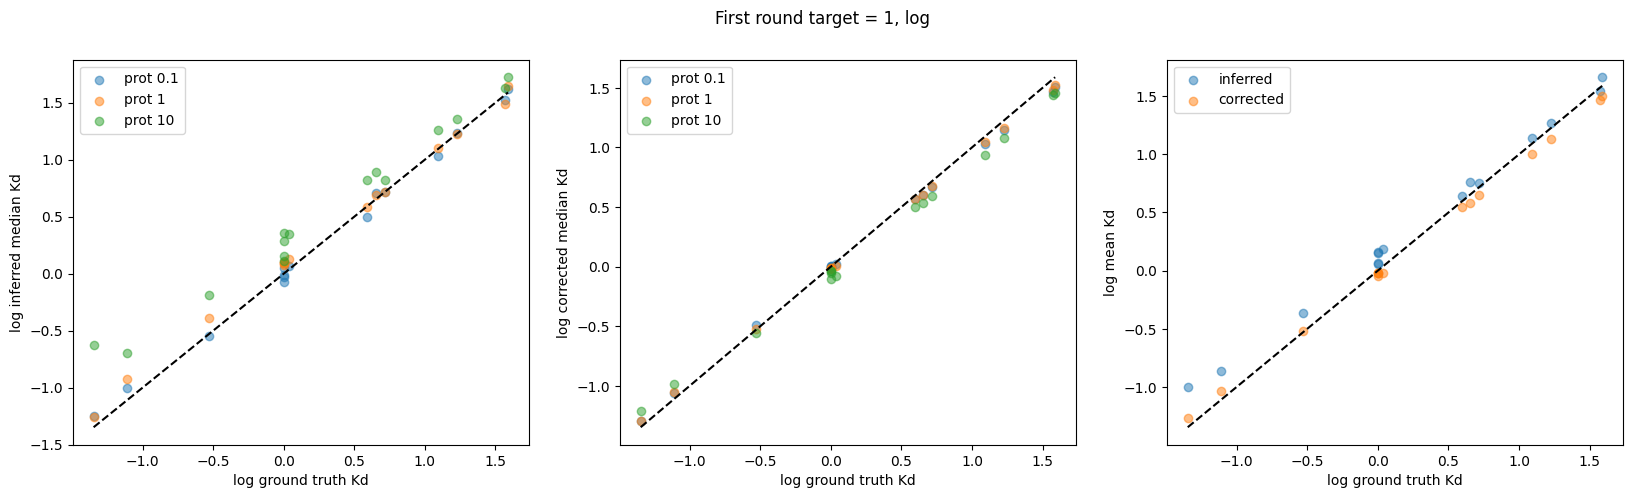

squared error for mean of inferred Kds and corrected Kds
0.026
0.043
difference between squared error for mean of inferred Kds and corrected Kds
-0.017


In [215]:
MIME_correction.comparison_plot(ground_truths[3],round_2s[3],round_2s[4],round_2s[5],corrected_round_2s[3],corrected_round_2s[4],corrected_round_2s[5], "First round target = 1")

squared error for inferred Kds
0.012
0.01
0.122
squared error for corrected Kds
0.021
0.029
0.075
difference between squared error for inferred Kds and corrected Kds
-0.009
-0.019
0.048


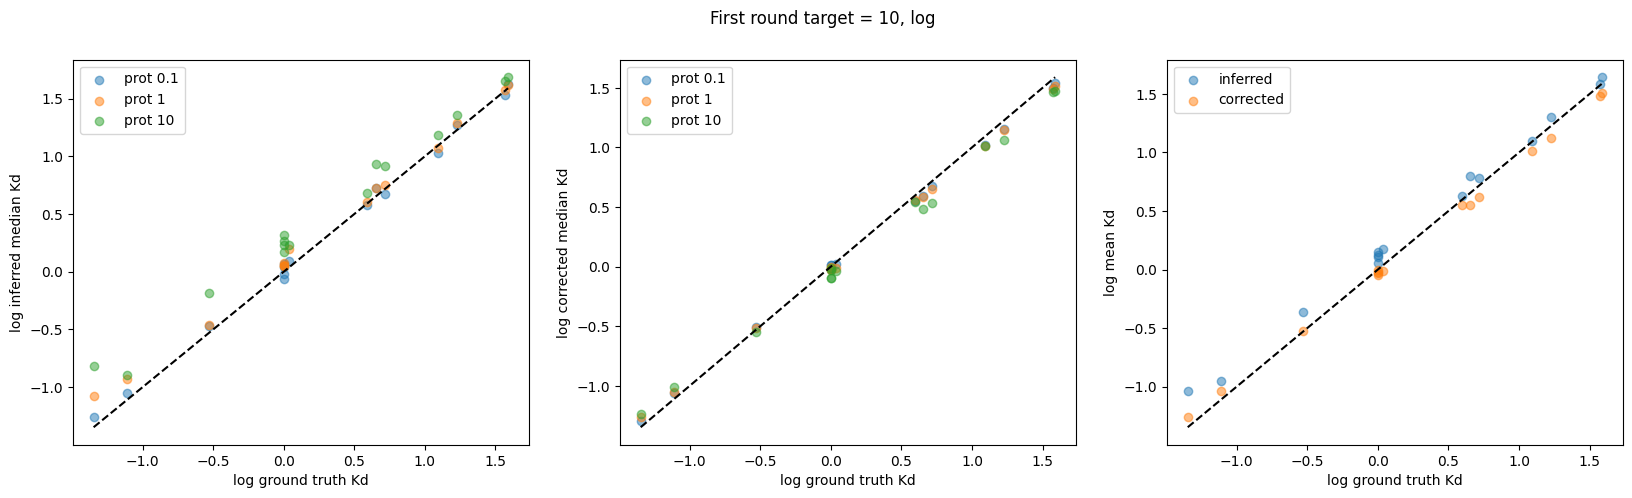

squared error for mean of inferred Kds and corrected Kds
0.025
0.037
difference between squared error for mean of inferred Kds and corrected Kds
-0.012


In [216]:
MIME_correction.comparison_plot(ground_truths[6],round_2s[6],round_2s[7],round_2s[8],corrected_round_2s[6],corrected_round_2s[7],corrected_round_2s[8], "First round target = 10")

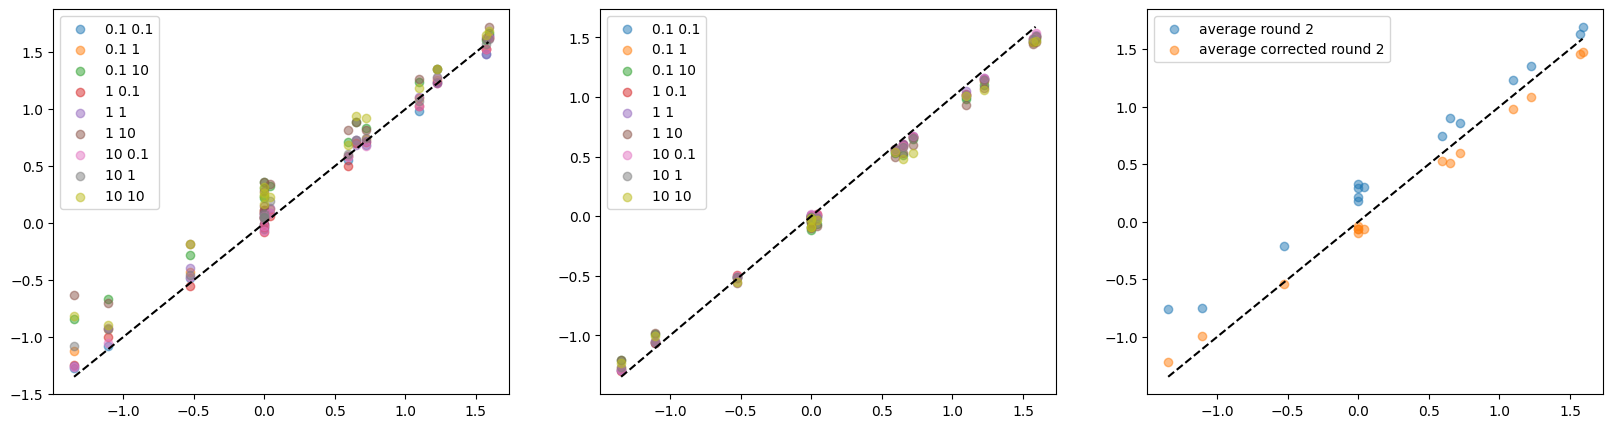

In [217]:
# plot all corrected rounds in one plot
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

ax1.scatter(np.log(ground_truths[0]), np.log(round_2s[0]), label="0.1 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[1]), np.log(round_2s[1]), label="0.1 1", alpha=.5)
ax1.scatter(np.log(ground_truths[2]), np.log(round_2s[2]), label="0.1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[3]), np.log(round_2s[3]), label="1 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[4]), np.log(round_2s[4]), label="1 1", alpha=.5)
ax1.scatter(np.log(ground_truths[5]), np.log(round_2s[5]), label="1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[6]), np.log(round_2s[6]), label="10 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[7]), np.log(round_2s[7]), label="10 1", alpha=.5)
ax1.scatter(np.log(ground_truths[8]), np.log(round_2s[8]), label="10 10", alpha=.5)
ax1.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax1.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

ax2.scatter(np.log(ground_truths[0]), np.log(corrected_round_2s[0]), label="0.1 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[1]), np.log(corrected_round_2s[1]), label="0.1 1", alpha=.5)
ax2.scatter(np.log(ground_truths[2]), np.log(corrected_round_2s[2]), label="0.1 10", alpha=.5)
ax2.scatter(np.log(ground_truths[3]), np.log(corrected_round_2s[3]), label="1 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[4]), np.log(corrected_round_2s[4]), label="1 1", alpha=.5)
ax2.scatter(np.log(ground_truths[5]), np.log(corrected_round_2s[5]), label="1 10", alpha=.5)
ax2.scatter(np.log(ground_truths[6]), np.log(corrected_round_2s[6]), label="10 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[7]), np.log(corrected_round_2s[7]), label="10 1", alpha=.5)
ax2.scatter(np.log(ground_truths[8]), np.log(corrected_round_2s[8]), label="10 10", alpha=.5)
ax2.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax2.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

# plot the averages of corrected and uncorrected
round_2s = np.array(round_2s)
corrected_round_2s = np.array(corrected_round_2s)
ground_truths = np.array(ground_truths)

average_round_2 = np.mean(round_2s[[2,5,8]], axis=0)
average_corrected_round_2 = np.mean(corrected_round_2s[[2,5,8]], axis=0)
average_ground_truth = np.mean(ground_truths, axis=0)

ax3.scatter(np.log(average_ground_truth), np.log(average_round_2), label="average round 2", alpha=.5)
ax3.scatter(np.log(average_ground_truth), np.log(average_corrected_round_2), label="average corrected round 2", alpha=.5)
ax3.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(average_ground_truth)), np.max(np.log(average_ground_truth)), 100)
y = x
ax3.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

plt.show()

looks like the uncorrected values are sorted from better to worse in priority 2nd round concentration low to high > first round concentration low to high
So from best to worst : .1_.1, 1_.1, 10_.1, 1_.1, 1_1, 1_10, 10_.1, 10_1, 10_10
with correction this seems to change. now the first round concentrations seems to not really matter anymore.
Can see this really well when looking at a fixed second round concentration and all 3 different first round concentrations.
The three different first round protein concentrations get corrected to be roughly on the same line.

With a fixed first round concentration the lines don't get "united" but just for high first round concentrations the lines all get shifted closer to 1to1 line retaining their difference in slope.

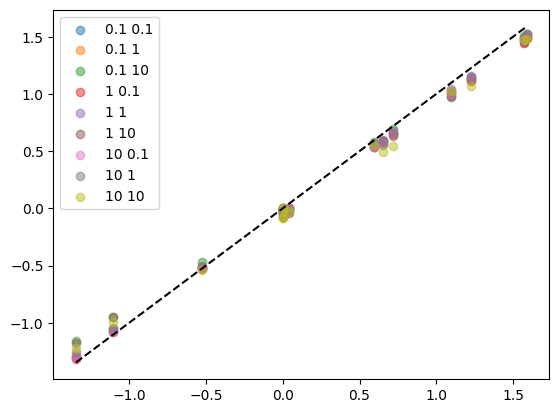

In [218]:
# plot ground truth vs corrected round 2
fig, ax = plt.subplots()
ax.scatter(np.log(ground_truths[0]), np.log(corrected_round_2s[0]) - np.median(np.log(corrected_round_2s[0])), label="0.1 0.1", alpha=.5)
ax.scatter(np.log(ground_truths[1]), np.log(corrected_round_2s[1]) - np.median(np.log(corrected_round_2s[1])), label="0.1 1", alpha=.5)
ax.scatter(np.log(ground_truths[2]), np.log(corrected_round_2s[2]) - np.median(np.log(corrected_round_2s[2])), label="0.1 10", alpha=.5)
ax.scatter(np.log(ground_truths[3]), np.log(corrected_round_2s[3]) - np.median(np.log(corrected_round_2s[3])), label="1 0.1", alpha=.5)
ax.scatter(np.log(ground_truths[4]), np.log(corrected_round_2s[4]) - np.median(np.log(corrected_round_2s[4])), label="1 1", alpha=.5)
ax.scatter(np.log(ground_truths[5]), np.log(corrected_round_2s[5]) - np.median(np.log(corrected_round_2s[5])), label="1 10", alpha=.5)
ax.scatter(np.log(ground_truths[6]), np.log(corrected_round_2s[6]) - np.median(np.log(corrected_round_2s[6])), label="10 0.1", alpha=.5)
ax.scatter(np.log(ground_truths[7]), np.log(corrected_round_2s[7]) - np.median(np.log(corrected_round_2s[7])), label="10 1", alpha=.5)
ax.scatter(np.log(ground_truths[8]), np.log(corrected_round_2s[8]) - np.median(np.log(corrected_round_2s[8])), label="10 10", alpha=.5)
ax.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax.plot(x,y, label="1 to 1 line", linestyle="--", color="black")
plt.show()

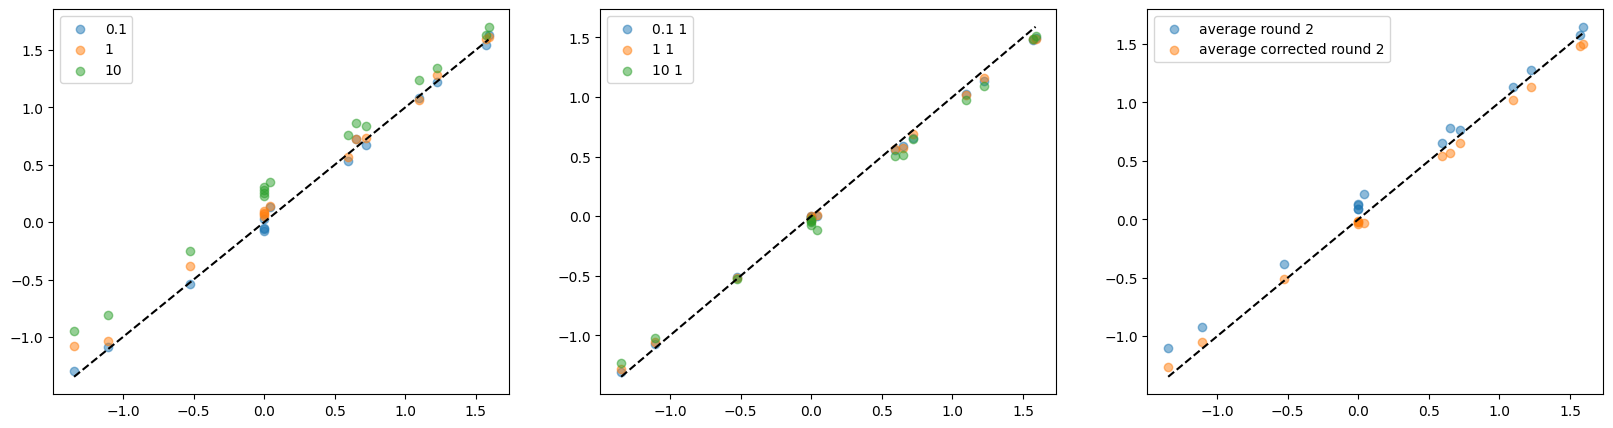

In [219]:
# plot all corrected rounds in one plot
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

ax1.scatter(np.log(ground_truths[0]), np.log(round_1s[0]), label="0.1", alpha=.5)
# ax1.scatter(np.log(ground_truths[1]), np.log(round_1s[1]), label="0.1 1", alpha=.5)
# ax1.scatter(np.log(ground_truths[2]), np.log(round_1s[2]), label="0.1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[3]), np.log(round_1s[3]), label="1", alpha=.5)
# ax1.scatter(np.log(ground_truths[4]), np.log(round_1s[4]), label="1 1", alpha=.5)
# ax1.scatter(np.log(ground_truths[5]), np.log(round_1s[5]), label="1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[6]), np.log(round_1s[6]), label="10", alpha=.5)
# ax1.scatter(np.log(ground_truths[7]), np.log(round_1s[7]), label="10 1", alpha=.5)
# ax1.scatter(np.log(ground_truths[8]), np.log(round_1s[8]), label="10 10", alpha=.5)
ax1.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax1.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

# ax2.scatter(np.log(ground_truths[0]), np.log(corrected_round_1s[0]), label="0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[1]), np.log(corrected_round_1s[1]), label="0.1 1", alpha=.5)
# ax2.scatter(np.log(ground_truths[2]), np.log(corrected_round_1s[2]), label="0.1 10", alpha=.5)
# ax2.scatter(np.log(ground_truths[3]), np.log(corrected_round_1s[3]), label="1", alpha=.5)
ax2.scatter(np.log(ground_truths[4]), np.log(corrected_round_1s[4]), label="1 1", alpha=.5)
# ax2.scatter(np.log(ground_truths[5]), np.log(corrected_round_1s[5]), label="1 10", alpha=.5)
# ax2.scatter(np.log(ground_truths[6]), np.log(corrected_round_1s[6]), label="10", alpha=.5)
ax2.scatter(np.log(ground_truths[7]), np.log(corrected_round_1s[7]), label="10 1", alpha=.5)
# ax2.scatter(np.log(ground_truths[8]), np.log(corrected_round_1s[8]), label="10 10", alpha=.5)
ax2.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax2.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

# plot the averages of corrected and uncorrected
round_1s = np.array(round_1s)
corrected_round_1s = np.array(corrected_round_1s)
ground_truths = np.array(ground_truths)

average_round_1 = np.mean(round_1s, axis=0)
average_corrected_round_1 = np.mean(corrected_round_1s, axis=0)
average_ground_truth = np.mean(ground_truths, axis=0)

ax3.scatter(np.log(average_ground_truth), np.log(average_round_1), label="average round 2", alpha=.5)
ax3.scatter(np.log(average_ground_truth), np.log(average_corrected_round_1), label="average corrected round 2", alpha=.5)
ax3.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(average_ground_truth)), np.max(np.log(average_ground_truth)), 100)
y = x
ax3.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

plt.show()